# Plotting Sensor Event in Episode

### import

In [71]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import datetime as dt
import collections
import sys

### load sample episode

In [176]:
file_name = "Seminar_0"
# file_name = "Reading_0"#"Small talk_0", 
# file_name = "Lab meeting_0"
# file_name = "Technical discussion_0"
directory = file_name.split("_")[0]

# PodiumIR
# df = pd.read_csv(f"./data_new/{file_name.split("_")[0]}/sensor/{file_name}.csv")
# sensor_name = ["PodiumIR"]

# Sound
df = pd.read_csv(f"./data_new/{directory}/sensor/{file_name}.csv")
# sensor_names = ["Sound_C", "Sound_L", "Sound_R", "Sound_P"]
# sensor_names = [f"Motion_{i}" for i in range(1, 9)]
sensor_names = ["Brightness_1", "Humidity_1", "Temperature_1"]
# sensor_names = ["PodiumIR"]
# sensor_names = [f"Seat_{i}" for i in [1, 4, 7, 8 ,10]]

timestamps = df.timestamp.tolist()

start, end = min(timestamps), max(timestamps)

### load sample episode (Sound)


In [152]:
file_name1, file_name2 = "Reading_0", "Seminar_0"
directory1 = file_name1.split("_")[0]
directory2 = file_name2.split("_")[0]

# PodiumIR
# df = pd.read_csv(f"./data_new/{file_name.split("_")[0]}/sensor/{file_name}.csv")
# sensor_name = ["PodiumIR"]

# Sound
df1 = pd.read_csv(f"./data_new/{directory1}/sensor/{file_name1}.csv")
df2 = pd.read_csv(f"./data_new/{directory2}/sensor/{file_name2}.csv")
sensor_names = ["Sound_C", "Sound_L", "Sound_R", "Sound_P"]

timestamps1 = df1.timestamp.tolist()
timestamps2 = df2.timestamp.tolist()

start1, end1 = min(timestamps1), max(timestamps1)
start2, end2 = min(timestamps2), max(timestamps2)

### extract certain sensor

In [177]:
df_sensor = df[df.sensor_name.isin(sensor_names)]

sensors_dict= collections.defaultdict(list)

for sensor in sensor_names:

    target = df_sensor[df_sensor.sensor_name==sensor]

    timestamps = target.timestamp.tolist()
    # values = [1 if item=="True" else 0 for item in target.value.tolist()]
    values = [float(item) for item in target.value.tolist()]


    sensors_dict[sensor]=[timestamps, values]

# assert len(timestamps)==len(values)

### plot graph (Brightness)

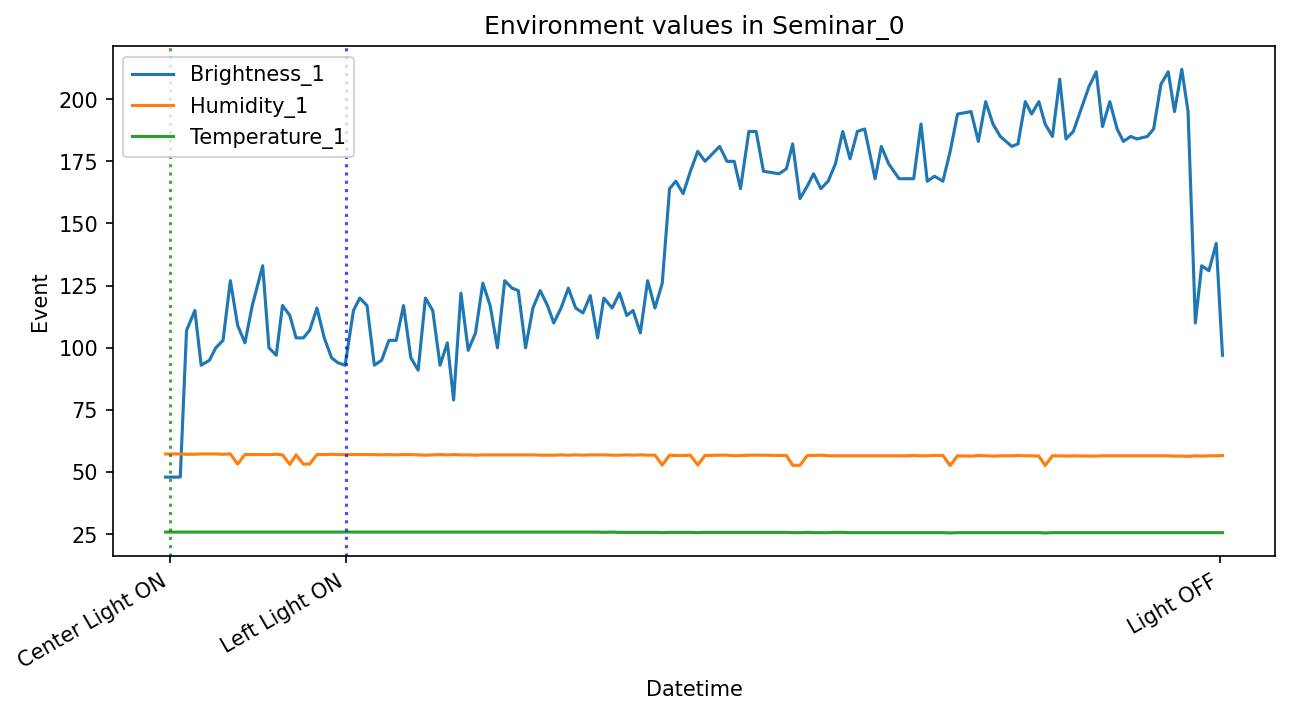

In [188]:
fig = plt.figure(figsize=(10, 5), dpi=150)
ax = fig.add_subplot(1, 1, 1)

center_start_timestamp, center_end_timestamp = (1505091269251, 1505092271469)
left_start_timestamp, left_end_timestamp = (1505091438036, 1505092276386)

center_start = dt.datetime.fromtimestamp(int(center_start_timestamp/1000))
center_end = dt.datetime.fromtimestamp(int(center_end_timestamp/1000))

left_start = dt.datetime.fromtimestamp(int(left_start_timestamp/1000))
left_end = dt.datetime.fromtimestamp(int(left_end_timestamp/1000))

ax.set_title(f"Environment values in {file_name}")

ax.set_xlabel("Datetime")
ax.set_ylabel("Event")

for i, sensor in enumerate(sensor_names):

    timestamps, values = sensors_dict[sensor]
    timestamp_to_date = [dt.datetime.fromtimestamp(int(item/1000)) for item in timestamps]
    ax.plot(timestamp_to_date, values, label=sensor)

    myFmt = DateFormatter("%Y-%m-%d %H:%M:%S")
    ax.xaxis.set_major_formatter(myFmt)

    fig.autofmt_xdate(rotation=30)

    myFmt = DateFormatter("%H:%M:%S")
    ax.xaxis.set_major_formatter(myFmt)

ax.set_xticks(
        [center_start, left_start, left_end]
    )

ax.set_xticklabels(
    ["Center Light ON", "Left Light ON", "Light OFF"]
)
    

plt.axvline(center_start, linestyle=":", color='g', alpha=0.7)
plt.axvline(left_start, linestyle=":", color='b', alpha=0.7)

ax.legend()
plt.savefig("./sensordata_environments.png")

### extract certain sensor (Sound)

In [153]:
df_sensor1 = df1[df1.sensor_name.isin(sensor_names)]
df_sensor2 = df2[df2.sensor_name.isin(sensor_names)]

sensors_dict1 = collections.defaultdict(list)
sensors_dict2 = collections.defaultdict(list)

for sensor in sensor_names:

    target1 = df_sensor1[df_sensor1.sensor_name==sensor]
    timestamps1 = target1.timestamp.tolist()
    values1 = [float(item) for item in target1.value.tolist()]

    sensors_dict1[sensor]=[timestamps1, values1]

    target2 = df_sensor2[df_sensor2.sensor_name==sensor]
    timestamps2 = target2.timestamp.tolist()
    values2 = [float(item) for item in target2.value.tolist()]

    sensors_dict2[sensor]=[timestamps2, values2]

# assert len(timestamps)==len(values)

### extract certain sensor (Seat)

In [131]:
df_sensor = df[df.sensor_name.isin(sensor_names)]

sensors_dict= collections.defaultdict(list)

for sensor in sensor_names:

    target = df_sensor[df_sensor.sensor_name==sensor]

    timestamps = target.timestamp.tolist()
    values = [1 if item=="True" else 0 for item in target.value.tolist()]
    # values = [int(item) for item in target.value.tolist()]

    assert len(timestamps)==len(values)

    initial = [(timestamps[i], values[i]) for i in range(len(timestamps))]

    sensor_start = timestamps[0]
    for i in range(1, len(timestamps)):
        tc, vc = timestamps[i], values[i]
        tb, vb = timestamps[i-1], values[i-1]
        if vc!=vb:
            idx = initial.index((tc, vc))
            initial.insert(idx, (tc, vb))

    start_value = initial[0][1]
    if start_value==0:
        initial = [(start, 1), (initial[0][0], 1)] + initial
    else:
        initial = [(start, 0), (initial[0][0], 0)] + initial
    
    end_value = initial[-1][1]
    if end_value==0:
        initial = initial + [(end, 0)]
    else:
        initial = initial + [(end, 1)]

    timestamps = [item[0] for item in initial]    
    values = [item[1] for item in initial]
    
    sensors_dict[sensor]=[timestamps, values]

# assert len(timestamps)==len(values)

### extract certain sensor (Motion)

In [138]:
df_sensor = df[df.sensor_name.isin(sensor_names)]

sensors_dict= collections.defaultdict(list)

for sensor in sensor_names:

    target = df_sensor[df_sensor.sensor_name==sensor]

    timestamps = target.timestamp.tolist()
    values = [1 if item=="True" else 0 for item in target.value.tolist()]
    # values = [int(item) for item in target.value.tolist()]

    assert len(timestamps)==len(values)

    initial = [(timestamps[i], values[i]) for i in range(len(timestamps))]

    sensor_start = timestamps[0]
    for i in range(1, len(timestamps)):
        tc, vc = timestamps[i], values[i]
        tb, vb = timestamps[i-1], values[i-1]
        if vc!=vb:
            idx = initial.index((tc, vc))
            initial.insert(idx, (tc, vb))

    start_value = initial[0][1]
    if start_value==1:
        initial = [(start, 0), (initial[0][0], 0)] + initial
    else:
        initial = [(start, 0)] + initial

    timestamps = [item[0] for item in initial]    
    values = [item[1] for item in initial]
    
    sensors_dict[sensor]=[timestamps, values]

# assert len(timestamps)==len(values)

### plot graph (Motion)

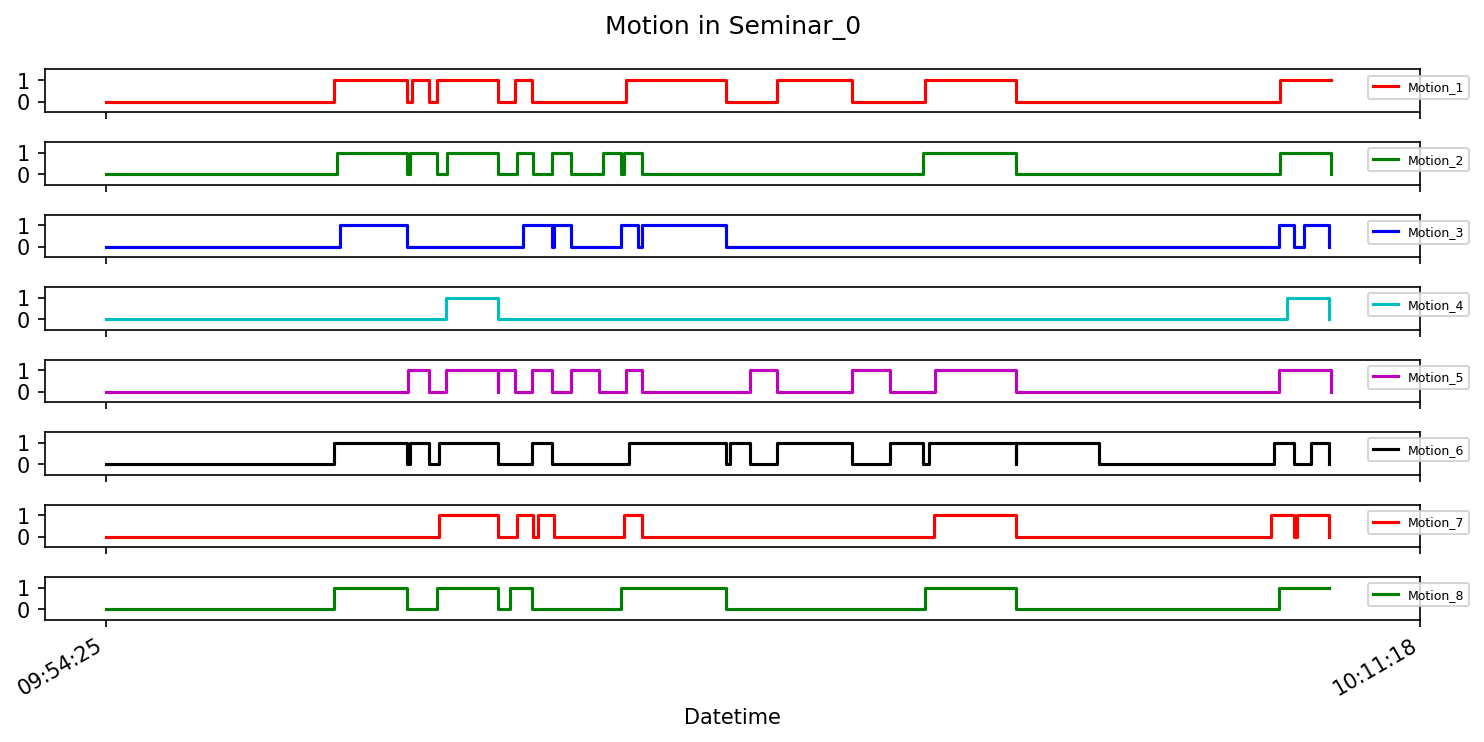

In [140]:
fig = plt.figure(figsize=(10, 5), dpi=150)
st = fig.suptitle(f"Motion in {file_name}")

colorstring = "rgbcmk"

for i, sensor in enumerate(sensor_names):

    ax = fig.add_subplot(len(sensor_names), 1, (i+1))

    ax.set_ylim(-0.5, 1.5)
    ax.set_yticks([0, 1])
    # ax.set_yticklabels(["No Motion", "Motion"])

    ax.set_xlabel("Datetime")
    # ax.set_ylabel("Value")

    timestamps, values = sensors_dict[sensor]
    timestamp_to_date = [dt.datetime.fromtimestamp(int(item/1000)) for item in timestamps]
    ax.plot(timestamp_to_date, values, label=sensor, color=colorstring[i%len(colorstring)])

    ax.set_xticks(
        [dt.datetime.fromtimestamp(int(start/1000)), dt.datetime.fromtimestamp(int(end/1000))]
    )

    myFmt = DateFormatter("%Y-%m-%d %H:%M:%S")
    ax.xaxis.set_major_formatter(myFmt)

    fig.autofmt_xdate(rotation=30)

    myFmt = DateFormatter("%H:%M:%S")
    ax.xaxis.set_major_formatter(myFmt)

    ax.legend(loc='upper right', prop={'size': 6}, bbox_to_anchor=(1.04, 1))
fig.tight_layout()
    
plt.savefig("./sensordata_motion_seminar.png")

### plot graph (PodiumIR)

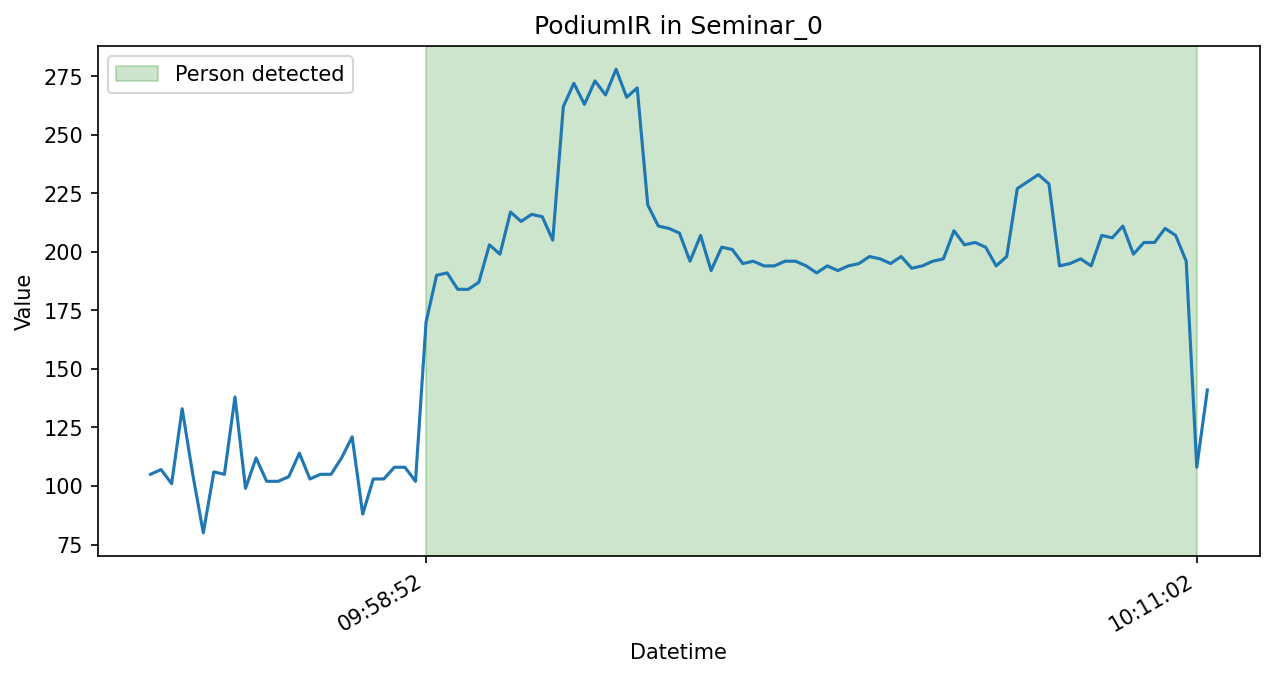

In [62]:
fig = plt.figure(figsize=(10, 5), dpi=150)

start_timestamp, end_timestamp = (1505091532142, 1505092262915)

person_start = dt.datetime.fromtimestamp(int(start_timestamp/1000))
person_end = dt.datetime.fromtimestamp(int(end_timestamp/1000))

for i, sensor in enumerate(sensor_names):

    ax = fig.add_subplot(len(sensor_names), 1, (i+1))

    ax.set_title(f"{sensor} in {file_name}")

    ax.set_xlabel("Datetime")
    ax.set_ylabel("Value")

    timestamps, values = sensors_dict[sensor]
    timestamp_to_date = [dt.datetime.fromtimestamp(int(item/1000)) for item in timestamps]
    ax.plot(timestamp_to_date, values)#, label=sensor)

    ax.set_xticks(
        [person_start, person_end]
    )

    myFmt = DateFormatter("%Y-%m-%d %H:%M:%S")
    ax.xaxis.set_major_formatter(myFmt)

    fig.autofmt_xdate(rotation=30)

    myFmt = DateFormatter("%H:%M:%S")
    ax.xaxis.set_major_formatter(myFmt)

    

    plt.axvspan(person_start, person_end, color='g', alpha=0.2, label="Person detected")

    ax.legend()
plt.savefig("./sensordata_podiumir.png")

### plot graph (Sound)

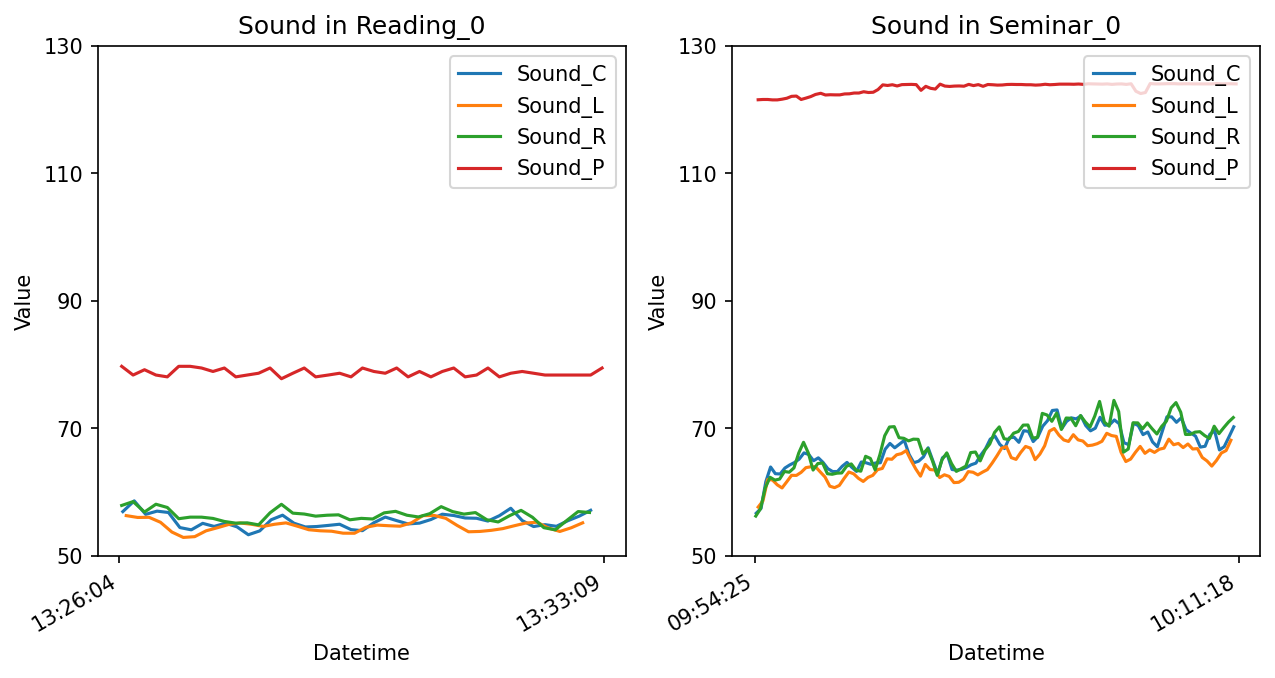

In [156]:
fig = plt.figure(figsize=(10, 5), dpi=150)
# ax = plt.axes()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title(f"Sound in {file_name1}")
ax2.set_title(f"Sound in {file_name2}")

ax1.set_yticks([])


ax1.set_xlabel("Datetime")
ax1.set_ylabel("Value")
ax2.set_xlabel("Datetime")
ax2.set_ylabel("Value")



for k in sensors_dict1.keys():
    timestamps, values = sensors_dict1[k]

    timestamp_to_date = [dt.datetime.fromtimestamp(int(item/1000)) for item in timestamps]

    ax1.plot(timestamp_to_date, values, label=k)

ax1.set_xticks(
    [dt.datetime.fromtimestamp(int(start1/1000)), dt.datetime.fromtimestamp(int(end1/1000))]
)


for k in sensors_dict2.keys():
    timestamps, values = sensors_dict2[k]

    timestamp_to_date = [dt.datetime.fromtimestamp(int(item/1000)) for item in timestamps]

    ax2.plot(timestamp_to_date, values, label=k)

ax2.set_xticks(
    [dt.datetime.fromtimestamp(int(start2/1000)), dt.datetime.fromtimestamp(int(end2/1000))]
)

myFmt = DateFormatter("%H:%M:%S")
ax1.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_formatter(myFmt)

fig.autofmt_xdate(rotation=30)

ax1.set_yticks(list(range(50, 131, 20)))
ax1.set_yticklabels([f"{i}0" for i in range(5, 14, 2)])
ax2.set_yticks(list(range(50, 131, 20)))
ax2.set_yticklabels([f"{i}0" for i in range(5, 14, 2)])


# person_start = dt.datetime.fromtimestamp(int(1505091532142/1000))
# person_end = dt.datetime.fromtimestamp(int(1505092262915/1000))
# plt.axvline(1505091532142, color="r",  alpha=0.9, linestyle=":", label="Arrival")
# plt.axvline(1505092262915, color="g",  alpha=0.9, linestyle=":", label="l")



# plt.axvspan(person_start, person_end, color='g', alpha=0.2, label="Person detected")
ax1.legend(loc=1)
ax2.legend(loc=1)
plt.savefig("./sensordata_sound.png")

### plot graph (Seat)

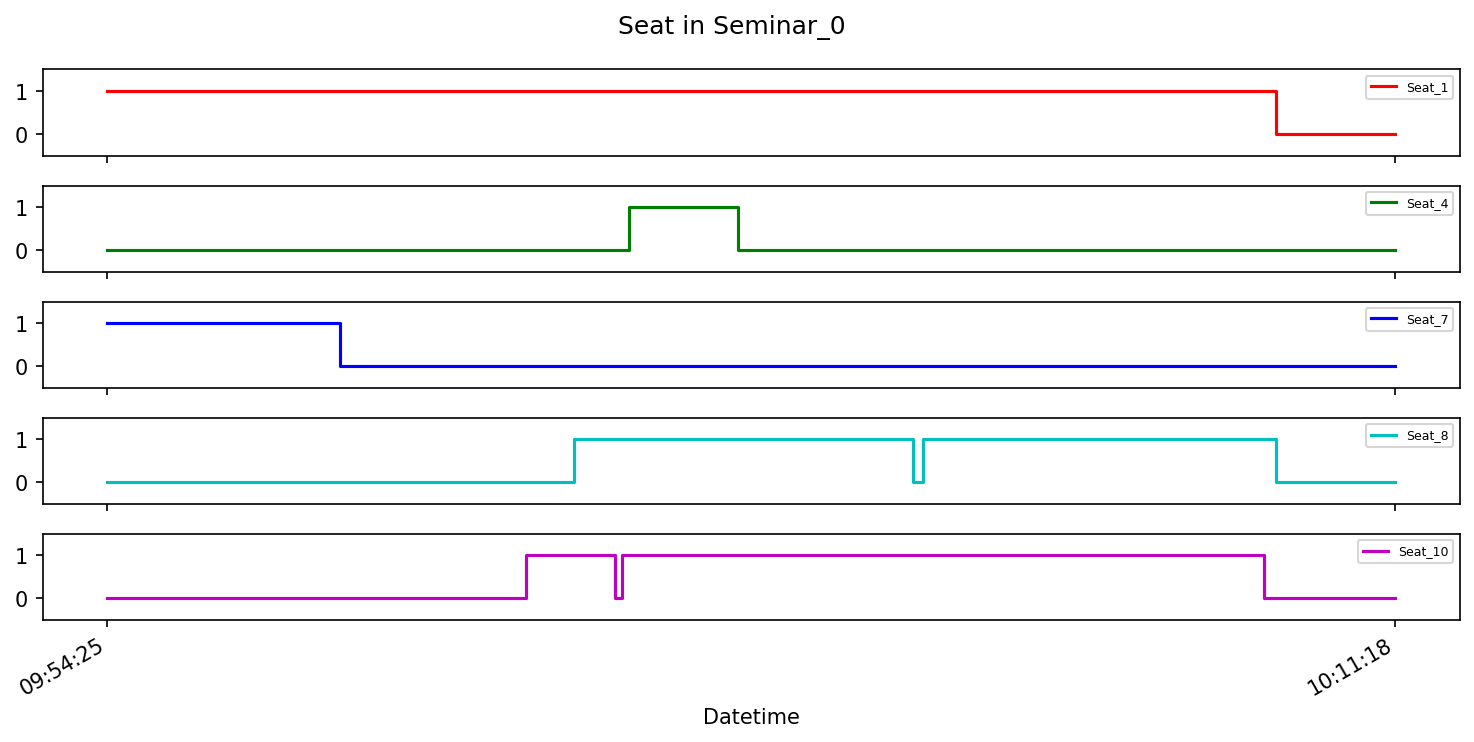

In [132]:
fig = plt.figure(figsize=(10, 5), dpi=150)
st = fig.suptitle(f"Seat in {file_name}")

colorstring = "rgbcmk"

for i, sensor in enumerate(sensor_names):

    ax = fig.add_subplot(len(sensor_names), 1, (i+1))

    ax.set_ylim(-0.5, 1.5)
    ax.set_yticks([0, 1])
    # ax.set_yticklabels(["No Motion", "Motion"])

    ax.set_xlabel("Datetime")
    # ax.set_ylabel("Value")

    timestamps, values = sensors_dict[sensor]
    timestamp_to_date = [dt.datetime.fromtimestamp(int(item/1000)) for item in timestamps]
    ax.plot(timestamp_to_date, values, label=sensor, color=colorstring[i%len(colorstring)])

    ax.set_xticks(
        [dt.datetime.fromtimestamp(int(start/1000)), dt.datetime.fromtimestamp(int(end/1000))]
    )

    myFmt = DateFormatter("%Y-%m-%d %H:%M:%S")
    ax.xaxis.set_major_formatter(myFmt)

    fig.autofmt_xdate(rotation=30)

    myFmt = DateFormatter("%H:%M:%S")
    ax.xaxis.set_major_formatter(myFmt)

    ax.legend(loc='upper right', prop={'size': 6})
fig.tight_layout()
    
plt.savefig("./sensordata_seat.png")